# CS 6220 - Fall 2016 - Homework 3 - Exercise 5

In [183]:
import numpy as np
from scipy.io import arff
import pandas as pd
import pprint
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline 

means = []
stds = []
def z_normalize(features):
    return np.nan_to_num((features - np.mean(features, axis=0)) / np.std(features, axis=0))


class Kmeans:
    def __init__(self, k, random_centroids, trial, data, max_iterations):
        self.k = k
        self.X = data
        self.max_iterations = max_iterations
        self.trial = trial
        self.random_c = np.array(random_centroids)
        self.centroids = self.init_centroids()
        self.clusters = None
        self.converge()

    def init_centroids(self):
        start = (self.trial - 1) * self.k
        end = self.trial * self.k
        centroid_indices = self.random_c[start:end]
        centroids = []
        for ci in centroid_indices:
            centroids.append(self.X[ci].flatten().tolist())
        return centroids

    def generate_clusters(self):
        clusters = [[] for c in self.centroids]
        for data_point in self.X:
            distance = float("inf")
            closest_centriod_index = None
            for cen_index, centriod in enumerate(self.centroids):
                temp_distance = np.linalg.norm(data_point - centriod)
                if temp_distance < distance:
                    distance = temp_distance
                    closest_centriod_index = cen_index
            clusters[closest_centriod_index].append(data_point)
        self.clusters = clusters

    def sum_cluster(self, cluster):
        sum = cluster[0]
        for data_point in cluster[1:]:
            sum += data_point
        return sum

    def meam_cluster(self, cluster):
        sum = self.sum_cluster(cluster)
        return sum / len(cluster)

    def move_centriods(self):
        new_centriods = []
        for cluster in self.clusters:
            new_centriods.append(np.mean(cluster, axis=0).tolist())
        return new_centriods

    def converge(self):
        # pprint.pprint(self.centroids)
        iteration = 0
        while iteration <= self.max_iterations:
            iteration += 1
            # print "iteration {}".format(iteration)
            self.generate_clusters()
            old_centroids = self.centroids
            self.centroids = self.move_centriods()
            # print "sse {}".format(self.generate_sse())
            if self.centroids == old_centroids:
                #print "{}-means, trail {}, converged after {} iterations".format(self.k,self.trial,iteration)
                break

    def generate_sse(self):
        distance = [[] for c in self.clusters]
        for index, cluster in enumerate(self.clusters):
            for data_point in cluster:
                a = (data_point - self.centroids[index])
                distance[index].append(a**2)
        return np.sum(np.sum(distance))


def load_data():
    data, meta = arff.loadarff('data/segment.arff')
    X = data[meta.names()[:-1]]  # everything but the last column
    y = data[meta.names()[-1]]
    X = X.view(np.float).reshape(
        data.shape + (-1,))  # converts the record array to a normal numpy array
    return X, y


def get_random_centriod():
    return [773, 1010, 240, 126, 319, 1666, 1215, 551, 668, 528, 1060, 168, 402, 80, 115, 221,
            242, 1951, 1725, 754, 1469, 135, 877, 1287, 645, 272, 1203, 1258, 1716, 1158, 586,
            1112, 1214, 153, 23, 510, 5, 1254, 156, 936, 1184, 1656, 244, 811, 1937, 1318, 27,
            185, 1424, 190, 663, 1208, 170, 1507, 1912, 1176, 1616, 109, 274, 1, 1371, 258, 1332,
            541, 662, 1483, 66, 12, 410, 1179, 1281, 145, 1410, 664, 155, 166, 1900, 1134, 1462,
            954, 1818, 1679, 832, 1627, 1760, 1330, 913, 234, 1635, 1078, 640, 833, 392, 1425,
            610, 1353, 1772, 908, 1964, 1260, 784, 520, 1363, 544, 426, 1146, 987, 612, 1685, 1121,
            1740, 287, 1383, 1923, 1665, 19, 1239, 251, 309, 245, 384, 1306, 786, 1814, 7, 1203,
            1068, 1493, 859, 233, 1846, 1119, 469, 1869, 609, 385, 1182, 1949, 1622, 719, 643,
            1692, 1389, 120, 1034, 805, 266, 339, 826, 530, 1173, 802, 1495, 504, 1241, 427, 1555,
            1597, 692, 178, 774, 1623, 1641, 661, 1242, 1757, 553, 1377, 1419, 306, 1838, 211, 356,
            541, 1455, 741, 583, 1464, 209, 1615, 475, 1903, 555, 1046, 379, 1938, 417, 1747, 342,
            1148, 1697, 1785, 298, 185, 1145, 197, 1207, 1857, 158, 130, 1721, 1587, 1455, 190,
            177, 1345, 166, 1377, 1958, 1727, 1134, 1953, 1602, 114, 37, 164, 1548, 199, 1112, 128,
            167, 102, 87, 25, 249, 1240, 1524, 198, 111, 1337, 1220, 1513, 1727, 159, 121, 1130,
            1954, 1561, 1260, 150, 1613, 1152, 140, 1473, 1734, 137, 1156, 108, 110, 1829, 1491,
            1799, 174, 847, 177, 1468, 97, 1611, 1706, 1123, 79, 171, 130, 100, 143, 1641, 181,
            135, 1280, 1442, 1188, 133, 99, 186, 1854, 27, 160, 130, 1495, 101, 1411, 814, 109, 95,
            111, 1582, 1816, 170, 1663, 1737, 1710, 543, 1143, 1844, 159, 48, 375, 1315, 1311, 1422]


def part_a():
    X, y = load_data()
    X= z_normalize(X)
    k_values = range(1, 13)
    sse_matrix = []
    for k in k_values:
        trial_sse = []
        for i in range(1, 26):
            kmeans = Kmeans(data=X, k=k, random_centroids=get_random_centriod(), trial=i, max_iterations=50)
            trial_sse.append(kmeans.generate_sse())
        sse_matrix.append(trial_sse)
    #pprint.pprint(sse_matrix, width=25)
    means.extend(map(lambda x: np.mean(x), sse_matrix))
    stds.extend(map(lambda x: np.std(x), sse_matrix))
    means_error_confidence=map(lambda x: x*2, stds)
    #print means
    #print stds
    #print means_error_confidence
    fig, ax = plt.subplots()
    fig.set_size_inches(10.0, 14.0)
    ax.errorbar(k_values, means,fmt='o-',yerr=means_error_confidence,ecolor='b', capthick=2, capsize=2)
    ax.set_ylabel("mean sse")
    ax.set_xlabel("k")
    ax.set_title("k-means: k vs. mean sse")
    
def part_b():
    #print means
    #print stds
    pd.set_option('display.notebook_repr_html', True)
    df=pd.DataFrame(range(1,13),columns=['k'])
    df['uk']  = means
    mean_add2sd = [x+(2*stds[i]) for i,x in enumerate(means)]
    mean_sub2sd = [x-(2*stds[i]) for i,x in enumerate(means)]
    df['uk-2sigmak']  = mean_sub2sd
    df['uk+2sigmak']  = mean_add2sd
    print df
    #print df.describe()

## Exercise 5a

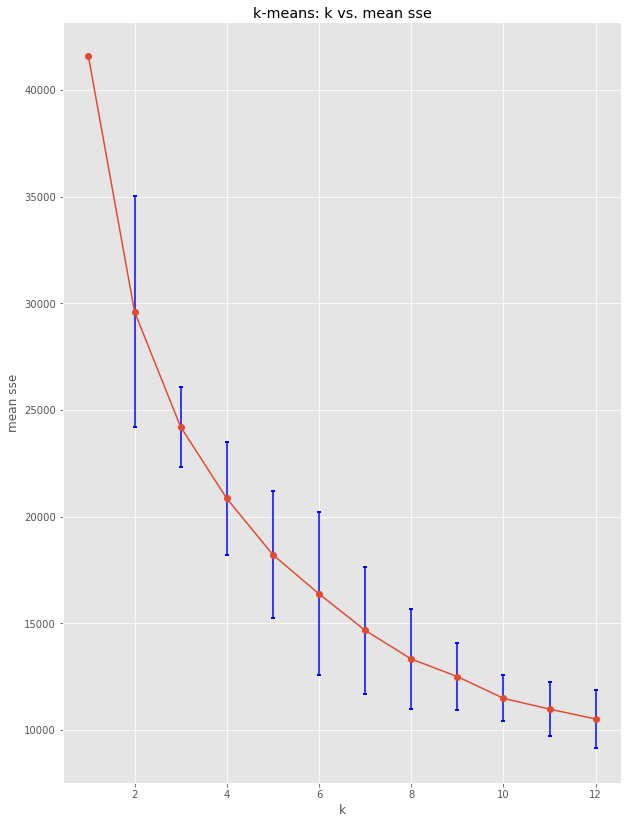

In [184]:
part_a()

## Exercise 5b

In [185]:
part_b()

     k            uk    uk-2sigmak    uk+2sigmak
0    1  41580.000000  41580.000000  41580.000000
1    2  29603.698815  24188.689830  35018.707800
2    3  24202.404840  22337.892790  26066.916890
3    4  20849.320874  18191.426160  23507.215589
4    5  18211.498918  15230.066723  21192.931112
5    6  16377.679456  12550.548616  20204.810296
6    7  14667.751544  11692.779326  17642.723761
7    8  13323.858857  10982.322434  15665.395281
8    9  12499.111689  10916.105657  14082.117721
9   10  11479.509424  10397.175854  12561.842993
10  11  10973.591590   9700.294483  12246.888698
11  12  10512.041784   9141.308079  11882.775489

[12 rows x 4 columns]


## Exercise 5c

**As `k` increases and approaches the total number of examples N, what value
does the SSE approach?**

As `k` increases and goes close to total number of examples N, SSE decreases and reduces to zero as `k=(total number of points)`.

**What problems does this cause in terms of using
SSE to choose an optimal `k`?**

We cannot use SSE for choosing `k` as it gives rise to model complexity. We cannot apply model selection or parameter choice algorithms such as cross validation as they are all based on min. error. Here with increase of `k` error always reduces, and reaches to zero, which will result in choosing `k=N` which is not we want.  

## Exercise 5d

**Can you suggest another measure of cluster compactness and separation that might be more useful than SSE?**

We can use Scatter Criteria to measure the compactness and separation of the cluster. The scalar scatter criteria are derived from the scatter matrices, reflecting the within-cluster scatter, the between-cluster scatter which gives the compactness and separation.